## support vector machine

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns


In [2]:
df = pd.read_csv("UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIP Code             0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.drop(["ID","ZIP Code"],axis=1,inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


Text(0.5, 1.0, 'Correlation Matrix')

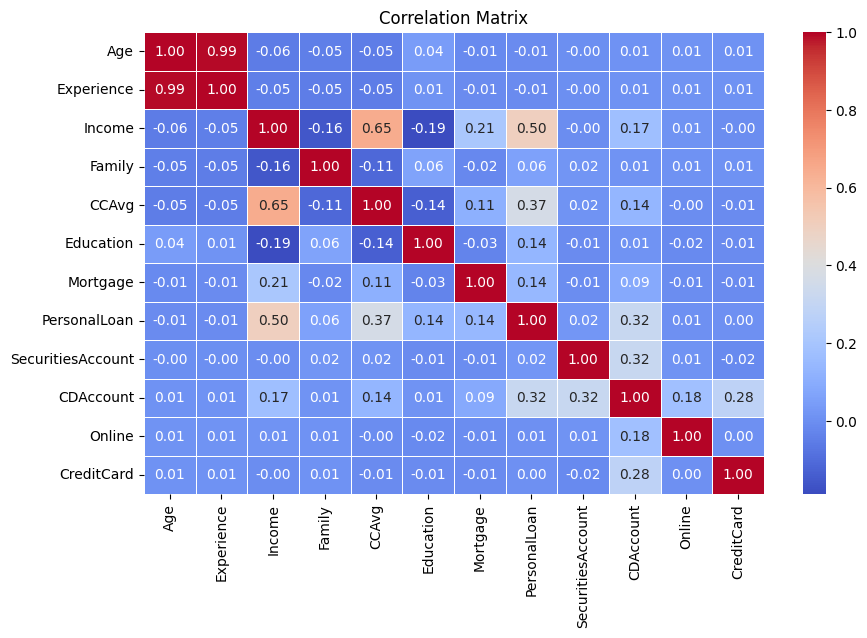

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True ,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Matrix")

In [11]:
zero_class = df[df["CreditCard"]==0]
one_class = df[df["CreditCard"]==1]
print(zero_class.shape,one_class.shape)

(3530, 12) (1470, 12)


In [ ]:
plt.scatter

In [ ]:
## ccavg vs family scatter plot

In [ ]:
## data scale -- aapko aapke data ko ek range me leke aana hota h  

## standard

In [20]:
## standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(df.drop("CreditCard",axis=1)).transform(df.drop("CreditCard",axis=1))

# scaled = scaler.fit_transform(df.drop("CreditCard",axis=1))

df_scaled = pd.DataFrame(scaler,columns=df.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [21]:
## x and y split 
x = df_scaled
y = df[["CreditCard"]]

In [22]:
## svm implementation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
model = SVC(kernel="linear",C=1)
model.fit(x_train,y_train)

/Users/priyanshubansal/developer/training/notebookenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [30]:
model.score(x_test,y_test)

0.752

In [31]:
model.score(x_train,y_train)

0.739

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       708
           1       0.85      0.18      0.30       292

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.69      1000

[[699   9]
 [239  53]]


Text(50.722222222222214, 0.5, 'Actual')

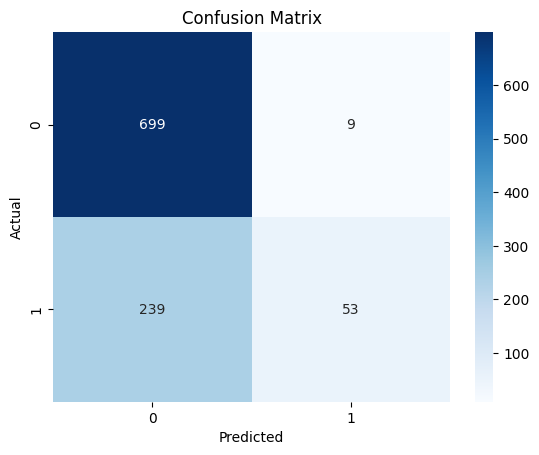

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
